In [1]:
# WHY DOESN'T THE INSTALL WORK????!!!!! >:O
import sys
sys.path.insert(1, '../tornado_mod')

In [2]:
import os
from importlib import reload

In [3]:
from classifier.__init__ import *
from drift_detection.__init__ import *
from streams.generators.__init__ import *

In [4]:
from run_experiments import create_datastreams, run_trials

In [5]:
MIMIC.set_path_to_data(os.path.abspath('mimic_bow.csv'))

streams = [MIMIC]
names = ['high_noise', 'low_noise', 'gradual_drift', 'abrupt_drift', 'long_concepts', 'short_concepts']
noise_rates = [0.4, 0.02, 0.1, 0.1, 0.1, 0.1]
concept_lens = [1000, 1000, 1000, 1000, 2000, 250]
transition_lens = [50, 50, 250, 0, 50, 50]

all_drift_locs = []
for name, noise, con_len, tran_len in zip(names, noise_rates, concept_lens, transition_lens):

    drift_locs = create_datastreams(
        './mimic_data/'+name, 
        streams, 
        n_trials=2, 
        stream_kwargs={
            'concept_length': con_len,
            'noise_rate': noise,
            'transition_length': tran_len,
            'n_priorities': 4, 
            'n_concepts': 2
        }
    )
    
    all_drift_locs.append(drift_locs)

You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/high_noise/MIMIC/MIMIC_0.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/high_noise/MIMIC/MIMIC_1.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/low_noise/MIMIC/MIMIC_0.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 1000 instances.
You can find the generated files in ./mimic_data/low_noise/MIMIC/MIMIC_1.arff!
You are going to generate a MIMIC data stream containing 2000 instances, and 1 concept drifts; 
where they appear at every 100

In [6]:
all_drift_locs

[{'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [1000]},
 {'MIMIC': [2000]},
 {'MIMIC': [250]}]

In [7]:
pairs = [
     [model, thingy, detector] for detector in [#CDDM(), BWAF(), BDDM(), FHDDM(),
FHDDMS(),
CUSUM(),
PH(),
DDM(),
EDDM(),
ADWINChangeDetector(),
SeqDrift2ChangeDetector(),
HDDM_A_test(),
HDDM_W_test()]
    for (model, thingy) in [
             [NaiveBayes, 'nominal'], 
             [Perceptron, 'numeric'], 
             [HoeffdingTree, 'nominal']
    ] if not (detector.DETECTOR_NAME.startswith("CDDM") and model in [Perceptron, NaiveBayes])
]

for name, locs in zip(names, all_drift_locs):
    run_trials('mimic_data/'+name, 
               'mimic_results/old_detectors/'+name, 
               locs, 
               pairs)

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/mimic_results/old_detectors/high_noise/MIMIC/MIMIC_1/20200610_035921/" is created.
NB + FHDDMS [0.4925, 1520.712, 238.7540636273684] [50, [1051, 1], 6, 0, 1.92, 1.2809829999298472]
PR + FHDDMS [0.5286, 93.568, 83.00637579480963] [250, [0, 0], 7, 1, 1.92, 2.362573999931783]
HT + FHDDMS [0.495, 1536.184, 419.2509914514915] [8, [1009, 1], 8, 0, 1.92, 1.1493600000846982]
NB + CUSUM [0.4333, 1523.944, 784.5939531732995] [250, [0, 0], 1, 1, 0.88, 2.443437999886555]
PR + CUSUM [0.4885, 93.344, 776.2166214290005] [250, [0, 0], 0, 1, 0.88, 6.103572999911933]
HT + CUSUM [0.4333, 1539.264, 1775.6401587770938] [250, [0, 0], 1, 1, 0.88, 1.2178440000099044]
NB + PageHinkley [0.571, 1537.928, 3732.3001458933522] [250, [0, 0], 0, 1, 0.96, 8.942015000208414]
PR + PageHinkley [0.4925, 93.344, 775.8695695483162] [250, [0, 0], 0, 1, 0.96, 5.1892429999078615]
HT + PageHinkley [0.571, 1552.808, 8337.310157365617] [250, [0, 0], 0, 1,

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:159: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NB + FHDDMS [0.4111, 1522.344, 467.5907688069856] [10, [1011, 1], 6, 0, 1.92, 2.395541000510093]
PR + FHDDMS [0.4586, 93.344, 72.15396777155547] [44, [1045, 1], 7, 0, 1.92, 2.392073000351047]
HT + FHDDMS [0.4919, 1536.632, 512.2098925355658] [201, [1202, 1], 9, 0, 1.92, 1.7271230003643723]
NB + CUSUM [0.4043, 1524.552, 963.6152163404859] [250, [0, 0], 1, 1, 0.88, 2.9215149997980916]
PR + CUSUM [0.351, 93.216, 777.6638239120643] [250, [0, 0], 0, 1, 0.88, 7.169132000456102]
HT + CUSUM [0.351, 15370.416, 7666.83901928019] [250, [0, 0], 0, 1, 0.88, 5.881857000645141]
NB + PageHinkley [0.396, 1534.472, 3884.766782457632] [250, [0, 0], 0, 1, 0.96, 8.780196000543583]
PR + PageHinkley [0.351, 93.216, 782.0290648379] [250, [0, 0], 0, 1, 0.96, 5.11661600177149]
HT + PageHinkley [0.351, 15370.416, 7671.187182891969] [250, [0, 0], 0, 1, 0.96, 4.795004001948655]
NB + DDM [0.3853, 1526.984, 1267.2684785144384] [250, [0, 0], 1, 1, 0.904, 4.029162002098019]
PR + DDM [0.3485, 93.216, 763.7766753005053]

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.4815, 1522.472, 568.6268268347021] [38, [1039, 1], 9, 0, 1.92, 4.490221000537531]
PR + FHDDMS [0.4898, 93.568, 140.3282143544402] [4, [1005, 1], 4, 0, 1.92, 5.556951999324156]
HT + FHDDMS [0.4603, 14890.856, 1637.408564494649] [71, [1072, 1], 6, 0, 1.92, 5.37394900027266]
NB + CUSUM [0.4184, 1526.408, 1341.9403197895008] [250, [0, 0], 1, 1, 0.88, 4.259840999679909]
PR + CUSUM [0.4315, 93.568, 268.08624225009225] [250, [0, 0], 1, 1, 0.88, 2.3322579997966386]
HT + CUSUM [0.3773, 15009.104, 2600.3116888171007] [250, [0, 0], 1, 1, 0.88, 2.0164360000762827]
NB + PageHinkley [0.4564, 1523.656, 705.1484505144572] [250, [0, 0], 1, 1, 0.96, 1.745787000800192]
PR + PageHinkley [0.407, 93.312, 773.9840477942153] [250, [0, 0], 0, 1, 0.96, 4.962865001175487]
HT + PageHinkley [0.4589, 14890.352, 1537.1228974261157] [250, [0, 0], 1, 1, 0.96, 0.9440259996154055]
NB + DDM [0.4115, 1528.104, 1484.8380123888774] [163, [1164, 1], 0, 0, 0.904, 4.73355399844877]
PR + DDM [0.4374, 93.568, 321.

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.6282, 1519.88, 141.71523122206509] [72, [1073, 1], 8, 0, 1.2, 0.7805010003494317]
PR + FHDDMS [0.4, 93.216, 1.8290823999222994] [3, [1004, 1], 3, 0, 1.176, 0.006906999828970584]
HT + FHDDMS [0.5, 1541.688, 2896.737635823797] [37, [1038, 1], 4, 0, 1.2, 10.642834998407125]
NB + CUSUM [0.4933, 1525.64, 1284.7739638378926] [250, [0, 0], 1, 1, 0.88, 3.62484800200491]
PR + CUSUM [0.4772, 93.504, 260.3653808987474] [250, [0, 0], 1, 1, 0.88, 2.1954909999521988]
HT + CUSUM [0.4933, 1540.96, 2686.717837494143] [250, [0, 0], 1, 1, 0.88, 1.8629380000447782]
NB + PageHinkley [0.5089, 1523.88, 820.3283493780873] [250, [0, 0], 1, 1, 0.96, 2.0007869998153183]
PR + PageHinkley [0.4929, 93.536, 188.2896360586983] [250, [0, 0], 1, 1, 0.96, 1.228625998919597]
HT + PageHinkley [0.5089, 1539.2, 1752.6284987061445] [250, [0, 0], 1, 1, 0.96, 1.0133530004168279]
NB + DDM [0.5047, 1527.464, 1520.8220262061332] [139, [1140, 1], 0, 0, 0.856, 4.720586999951593]
PR + DDM [0.4914, 93.536, 332.59749067

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.5517, 1519.496, 56.21841682068407] [34, [1035, 1], 5, 0, 1.752, 0.09591599882696755]
PR + FHDDMS [0.4421, 93.536, 140.97182076477566] [0, [1001, 1], 4, 0, 1.776, 5.026758000553855]
HT + FHDDMS [0.4034, 14772.616, 1196.2615082302364] [74, [1075, 1], 9, 0, 1.776, 4.344832000811039]
NB + CUSUM [0.4137, 1527.624, 1736.3026580102314] [136, [1137, 1], 0, 0, 0.88, 5.591189000369923]
PR + CUSUM [0.446, 93.344, 781.2910610959989] [250, [0, 0], 0, 1, 0.88, 6.976877002216497]
HT + CUSUM [0.3326, 28361.64, 3202.404346530102] [136, [1137, 1], 0, 0, 0.88, 2.624285998308551]
NB + PageHinkley [0.4397, 1525.96, 1271.8511788475553] [250, [0, 0], 1, 1, 0.96, 3.1036330001370516]
PR + PageHinkley [0.4485, 93.312, 783.1049551374463] [250, [0, 0], 0, 1, 0.96, 4.87007500009895]
HT + PageHinkley [0.3603, 28126.12, 2563.559140772327] [250, [0, 0], 1, 1, 0.96, 1.71684700080732]
NB + DDM [0.4243, 1528.04, 1686.38943992039] [87, [1088, 1], 0, 0, 0.904, 5.339534000995627]
PR + DDM [0.424, 93.664, 270

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.3922, 1519.784, 106.38435900591503] [48, [1049, 1], 10, 0, 1.92, 0.3917559990895825]
PR + FHDDMS [0.5294, 93.344, 33.80341463730474] [99, [1100, 1], 9, 0, 1.92, 0.45643600014955155]
HT + FHDDMS [0.4891, 1539.32, 1406.6943412642559] [7, [1008, 1], 9, 0, 1.92, 2.409183999589004]
NB + CUSUM [0.4376, 1527.944, 1593.2186118857317] [190, [1191, 1], 0, 0, 0.88, 4.811304002487304]
PR + CUSUM [0.4577, 93.472, 200.64752335383673] [250, [0, 0], 1, 1, 0.88, 1.6939409981659992]
HT + CUSUM [0.3619, 15128.688, 3133.5617166791963] [159, [1160, 1], 0, 0, 0.88, 2.4725259979732073]
NB + PageHinkley [0.4363, 1525.224, 937.3738177393989] [250, [0, 0], 1, 1, 0.96, 2.297784000120373]
PR + PageHinkley [0.414, 93.216, 783.6144159757623] [250, [0, 0], 0, 1, 0.96, 5.133616996772616]
HT + PageHinkley [0.4176, 15126.096, 2114.678595904934] [250, [0, 0], 1, 1, 0.96, 1.2711650022083631]
NB + DDM [0.4298, 1528.456, 1724.8244632080514] [101, [1102, 1], 0, 0, 0.856, 5.220477996772388]
PR + DDM [0.4764, 9

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.5435, 1521.224, 350.0469679102025] [2, [2003, 1], 15, 0, 1.136, 1.598491999629914]
PR + FHDDMS [0.5205, 93.664, 123.5814913663944] [205, [2206, 1], 12, 0, 1.136, 2.51177100062705]
HT + FHDDMS [0.3333, 1535.0, 8.563336187307868] [250, [0, 0], 18, 1, 1.112, 0.0027999999474559445]
NB + CUSUM [0.4798, 1534.216, 3764.921542879847] [167, [2168, 1], 0, 0, 0.88, 11.786674995391877]
PR + CUSUM [0.4719, 93.792, 672.3866400891438] [250, [0, 0], 1, 1, 0.88, 5.597506009280551]
HT + CUSUM [0.4798, 1549.536, 7947.5916311926085] [167, [2168, 1], 0, 0, 0.88, 5.0175060039237]
NB + PageHinkley [0.4941, 1524.456, 906.8462624579752] [250, [0, 0], 1, 1, 0.96, 2.34682400150632]
PR + PageHinkley [0.4838, 93.472, 1546.4487798599293] [250, [0, 0], 0, 1, 0.96, 9.551462994295434]
HT + PageHinkley [0.4941, 1539.776, 2068.3882318157885] [250, [0, 0], 1, 1, 0.96, 1.1068330004491145]
NB + DDM [0.4835, 1534.536, 3558.9171186616113] [156, [2157, 1], 0, 0, 0.904, 9.981856000649714]
PR + DDM [0.4778, 93.72

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.559, 1521.224, 376.964696142295] [99, [2100, 1], 15, 0, 1.92, 2.6935739983855456]
PR + FHDDMS [0.5371, 93.664, 91.35453372732627] [18, [2019, 1], 14, 0, 1.92, 3.2335080002212635]
HT + FHDDMS [0.4905, 1537.752, 1213.564109216577] [64, [2065, 1], 21, 0, 1.92, 3.1180539990600664]
NB + CUSUM [0.4248, 1535.144, 3807.7750846875915] [118, [2119, 1], 0, 0, 0.88, 11.865751001550962]
PR + CUSUM [0.4051, 93.664, 721.5570426235445] [128, [2129, 1], 0, 0, 0.88, 6.145136997929512]
HT + CUSUM [0.4248, 1550.432, 8052.976795029963] [118, [2119, 1], 0, 0, 0.88, 5.1789249944249605]
NB + PageHinkley [0.4266, 1534.792, 3473.9123193271553] [154, [2155, 1], 0, 0, 0.96, 8.260401993311461]
PR + PageHinkley [0.4125, 93.632, 628.5228699948675] [250, [0, 0], 1, 1, 0.96, 4.06223900176883]
HT + PageHinkley [0.4266, 1550.08, 7906.978676429389] [154, [2155, 1], 0, 0, 0.96, 4.294129997106211]
NB + DDM [0.4185, 1533.0, 2978.9972126959583] [250, [0, 0], 1, 1, 0.904, 8.815283006015306]
PR + DDM [0.4126, 93

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.4653, 1521.64, 456.8298921260521] [4, [255, 1], 1, 0, 1.92, 3.6212969991993305]
PR + FHDDMS [0.5161, 93.472, 112.15369583896972] [250, [0, 0], 2, 1, 1.92, 4.261986998926659]
HT + FHDDMS [0.5655, 1537.312, 1405.6456885421085] [250, [0, 0], 1, 1, 1.92, 4.078960999777337]
NB + CUSUM [0.606, 1523.24, 917.6824757980739] [250, [0, 0], 0, 1, 0.88, 2.8999020016726718]
PR + CUSUM [0.52, 93.216, 189.32849280781738] [250, [0, 0], 0, 1, 0.88, 1.5951539971865714]
HT + CUSUM [0.606, 1538.56, 1947.8052755184763] [250, [0, 0], 0, 1, 0.88, 1.3928770026723214]
NB + PageHinkley [0.606, 1523.24, 861.5336705092886] [250, [0, 0], 0, 1, 0.96, 2.170430999740347]
PR + PageHinkley [0.512, 93.216, 190.1709545986705] [250, [0, 0], 0, 1, 0.96, 1.2173009986327088]
HT + PageHinkley [0.606, 1538.56, 1945.1268671957678] [250, [0, 0], 0, 1, 0.96, 1.118998000265492]
NB + DDM [0.4677, 1519.88, 107.3868501787274] [187, [438, 1], 0, 0, 0.904, 0.2953390003312961]
PR + DDM [0.518, 93.248, 188.88754326530943] [

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

NB + FHDDMS [0.8, 1519.016, 8.682394750394451] [5, [256, 1], 1, 0, 1.176, 0.01289399983761541]
PR + FHDDMS [0.5366, 93.248, 15.626354755113425] [76, [327, 1], 1, 0, 1.2, 0.0997640006517031]
HT + FHDDMS [0.6267, 1535.736, 311.29599439350386] [38, [289, 1], 4, 0, 1.2, 0.1286389997403603]
NB + CUSUM [0.468, 1523.848, 964.0333351183017] [250, [0, 0], 0, 1, 0.88, 3.4066319958583335]
PR + CUSUM [0.498, 93.152, 192.3151862602026] [250, [0, 0], 0, 1, 0.88, 1.6823670034682436]
HT + CUSUM [0.468, 1539.168, 1920.5564470705667] [250, [0, 0], 0, 1, 0.88, 1.3859069990758144]
NB + PageHinkley [0.468, 1523.848, 886.9069657553155] [250, [0, 0], 0, 1, 0.96, 2.124652003203664]
PR + PageHinkley [0.506, 93.12, 191.91039562997503] [250, [0, 0], 0, 1, 0.96, 1.1800409999978]
HT + PageHinkley [0.468, 1539.168, 1929.7712932932427] [250, [0, 0], 0, 1, 0.96, 1.1161169998104015]
NB + DDM [0.5303, 1520.552, 233.9490641086286] [117, [368, 1], 0, 0, 0.904, 0.6710129998737102]
PR + DDM [0.4965, 93.408, 54.224879713729

In [8]:
pairs = [
     [model, thingy, detector] for detector in [CDDM(), BWAF(), BDDM(), FHDDM()]
# FHDDMS(),
# CUSUM(),
# PH(),
# DDM(),
# EDDM(),
# ADWINChangeDetector(),
# SeqDrift2ChangeDetector(),
# HDDM_A_test(),
# HDDM_W_test()]
    for (model, thingy) in [
             [NaiveBayes, 'nominal'], 
             [Perceptron, 'numeric'], 
             [HoeffdingTree, 'nominal']
    ] if not (detector.DETECTOR_NAME.startswith("CDDM") and model in [Perceptron, NaiveBayes])
]

for name, locs in zip(names, all_drift_locs):
    run_trials('mimic_data/'+name, 
               'mimic_results/new_detectors/'+name, 
               locs, 
               pairs)

The project path "/Users/hamishh/Documents/triage_concept_drift/experiments/mimic_results/new_detectors/high_noise/MIMIC/MIMIC_1/20200610_042956/" is created.


../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.6667, 1535.128, 35.135416024104416] [20, [1021, 1], 51, 0, 1.184, 0.8390969999254594]
NB + BWAF [0.4297, 1528.84, 1921.626127298623] [71, [1072, 1], 1, 0, 1.024, 61.06338700442393]
PR + BWAF [0.493, 93.312, 946.3186224943456] [250, [0, 0], 0, 1, 1.024, 118.88474800616677]
HT + BWAF [0.4297, 1544.664, 4019.868198055292] [71, [1072, 1], 1, 0, 1.024, 50.02187700347349]
NB + BDDM [0.571, 1537.928, 4065.4873979397053] [250, [0, 0], 0, 1, 2.848, 23834.510990000817]
PR + BDDM [0.4875, 93.312, 857.1703950299252] [250, [0, 0], 0, 1, 2.816, 23575.049414989713]
HT + BDDM [0.571, 1553.216, 8869.162803688596] [250, [0, 0], 0, 1, 2.832, 23617.519247004388]
NB + FHDDM [0.4393, 1523.816, 863.750151878321] [10, [1011, 1], 3, 0, 1.744, 2.763354003263885]
PR + FHDDM [0.4545, 93.664, 227.8810615364364] [250, [0, 0], 2, 1, 1.744, 1.9997900008092984]
HT + FHDDM [0.4283, 1539.832, 1995.1682339092258] [250, [0, 0], 3, 1, 1.744, 1.4332939999803784]
THE END

The project path "/Users/hamishh/Docume

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.619, 1535.16, 84.2810879339595] [13, [1014, 1], 52, 0, 1.568, 2.141594999557128]
NB + BWAF [0.3695, 1526.792, 1988.5850959294658] [114, [1115, 1], 0, 0, 1.024, 58.748590006416634]
PR + BWAF [0.4665, 93.28, 944.4353261308152] [250, [0, 0], 0, 1, 1.024, 116.40953200571857]
HT + BWAF [0.3715, 28125.256, 3823.881655052446] [22, [1023, 1], 0, 0, 1.024, 50.52491000151349]
NB + BDDM [0.487, 1535.272, 3766.234782112633] [250, [0, 0], 0, 1, 2.864, 24032.60672800843]
PR + BDDM [0.4725, 93.312, 822.963765798022] [250, [0, 0], 0, 1, 2.88, 23900.042755994717]
HT + BDDM [0.3549, 28125.288, 3774.444879533803] [250, [0, 0], 1, 1, 2.816, 5828.336073001083]
NB + FHDDM [0.4816, 1522.28, 588.9510187043925] [109, [1110, 1], 3, 0, 1.744, 1.996490997953515]
PR + FHDDM [0.5111, 93.504, 136.2152724218504] [143, [1144, 1], 3, 0, 1.744, 1.0899729986704187]
HT + FHDDM [0.4416, 14889.832, 1538.0784103299447] [250, [0, 0], 4, 1, 1.744, 1.0469479989296815]
THE END

The project path "/Users/hamishh/Docu

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.5405, 1535.544, 155.288143886537] [5, [1006, 1], 41, 0, 2.08, 3.8472150013149076]
NB + BWAF [0.5086, 1530.12, 2147.2592143641123] [12, [1013, 1], 0, 0, 1.024, 65.8011569998962]
PR + BWAF [0.5233, 93.664, 468.57997316919864] [13, [1014, 1], 0, 0, 1.024, 60.421276999022666]
HT + BWAF [0.4859, 14892.24, 4102.062762502555] [9, [1010, 1], 0, 0, 1.024, 51.94944699678672]
NB + BDDM [0.4929, 1529.704, 1753.6219270946276] [78, [1079, 1], 1, 0, 2.816, 4918.009695005367]
PR + BDDM [0.5, 93.664, 373.36175508335145] [91, [1092, 1], 0, 0, 2.816, 4697.445098994194]
HT + BDDM [0.4739, 14892.68, 3697.208813936868] [60, [1061, 1], 1, 0, 2.816, 5056.936915992992]
NB + FHDDM [0.5344, 1523.176, 662.1745587658552] [44, [1045, 1], 3, 0, 1.744, 2.233564002381172]
PR + FHDDM [0.5371, 93.664, 164.82500580286796] [10, [1011, 1], 2, 0, 1.744, 1.3626860013573605]
HT + FHDDM [0.5, 14889.96, 1559.549617409175] [77, [1078, 1], 3, 0, 1.744, 1.148216003912239]
THE END

The project path "/Users/hamishh/Doc

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.6818, 1535.192, 91.03211711635595] [36, [1037, 1], 29, 0, 1.6, 2.169602000776649]
NB + BWAF [0.3872, 1529.32, 1645.943443618762] [80, [1081, 1], 1, 0, 1.024, 59.01423399336636]
PR + BWAF [0.3754, 93.408, 435.49980025727564] [96, [1097, 1], 0, 0, 1.024, 52.558081003553525]
HT + BWAF [0.3872, 1545.144, 3883.9029975156336] [80, [1081, 1], 1, 0, 1.024, 45.15516399396802]
NB + BDDM [0.3984, 1534.152, 3718.4605770021335] [250, [0, 0], 1, 1, 2.816, 22053.609556005995]
PR + BDDM [0.3552, 93.44, 808.1197003953093] [250, [0, 0], 1, 1, 2.816, 21556.710910995662]
HT + BDDM [0.3498, 15370.288, 7597.8527308107] [250, [0, 0], 1, 1, 2.816, 21919.03139599799]
NB + FHDDM [0.4306, 1521.032, 259.9712138303403] [36, [1037, 1], 2, 0, 1.744, 0.8232699983636849]
PR + FHDDM [0.449, 93.344, 73.7656000314928] [70, [1071, 1], 1, 0, 1.744, 0.523779000104696]
HT + FHDDM [0.3896, 1538.072, 958.4464146264509] [0, [1000, 1], 4, 0, 1.744, 0.5561259999922186]
THE END

The project path "/Users/hamishh/Docum

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.6923, 1535.16, 108.44778240834785] [16, [1017, 1], 33, 0, 1.728, 2.6450210016264464]
NB + BWAF [0.4467, 1529.544, 2322.3250240666857] [14, [1015, 1], 0, 0, 1.024, 66.45581199973094]
PR + BWAF [0.4556, 93.568, 449.52672225190327] [9, [1010, 1], 0, 0, 1.024, 56.53080299998692]
HT + BWAF [0.4457, 14779.376, 4556.642325701432] [14, [1015, 1], 0, 0, 1.024, 56.57312101129719]
NB + BDDM [0.4038, 1528.04, 1572.8021023533074] [167, [1168, 1], 1, 0, 2.816, 4016.7534180000075]
PR + BDDM [0.404, 93.312, 836.8905225156595] [250, [0, 0], 0, 1, 3.024, 24727.373677996184]
HT + BDDM [0.3793, 15009.128, 2473.574558607652] [250, [0, 0], 2, 1, 2.816, 2287.0733740019205]
NB + FHDDM [0.4815, 1522.472, 561.1133384895766] [14, [1015, 1], 3, 0, 1.744, 1.7344259995297762]
PR + FHDDM [0.5247, 93.536, 98.78065821612836] [81, [1082, 1], 2, 0, 1.744, 0.8349400004590279]
HT + FHDDM [0.4661, 14773.288, 1347.5808162334033] [47, [1048, 1], 2, 0, 1.744, 0.8662649993311788]
THE END

The project path "/Users

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.5625, 1535.256, 130.98940986992602] [19, [1020, 1], 33, 0, 1.92, 3.4042249990307027]
NB + BWAF [0.5141, 1530.6, 2230.0512980982603] [9, [1010, 1], 0, 0, 1.024, 65.77354499313515]
PR + BWAF [0.4872, 93.536, 435.29853960899345] [10, [1011, 1], 1, 0, 1.024, 55.90245999837862]
HT + BWAF [0.5141, 1545.92, 4444.637570402392] [9, [1010, 1], 0, 0, 1.024, 50.48729799591456]
NB + BDDM [0.5178, 1529.672, 1840.2640135209367] [45, [1046, 1], 1, 0, 2.816, 5236.759685004472]
PR + BDDM [0.4979, 93.504, 398.40224227555154] [39, [1040, 1], 1, 0, 2.816, 5252.139331000308]
HT + BDDM [0.5178, 1545.464, 4146.079144094983] [45, [1046, 1], 1, 0, 2.816, 5180.099218999658]
NB + FHDDM [0.5129, 1524.968, 1078.4335080452365] [36, [1037, 1], 3, 0, 1.744, 3.654730996913713]
PR + FHDDM [0.4731, 93.504, 257.57361474370555] [250, [0, 0], 3, 1, 1.744, 2.2462739998445613]
HT + FHDDM [0.513, 1540.952, 2580.787425865765] [1, [1002, 1], 3, 0, 1.744, 1.8392879997009004]
THE END

The project path "/Users/hamishh

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.6452, 1535.416, 132.22622920102367] [0, [1000, 1], 41, 0, 1.888, 3.1491889999415434]
NB + BWAF [0.4111, 1528.584, 1863.2973865232998] [26, [1027, 1], 0, 0, 1.024, 64.98905600255966]
PR + BWAF [0.3801, 93.536, 464.1106004200992] [44, [1045, 1], 0, 0, 1.024, 58.94375799516638]
HT + BWAF [0.3114, 28362.248, 3790.12427228281] [26, [1027, 1], 0, 0, 1.024, 49.04925600385468]
NB + BDDM [0.4118, 1528.232, 1756.3973233982324] [47, [1048, 1], 0, 0, 2.816, 5297.996310006056]
PR + BDDM [0.4535, 93.568, 143.54325126987533] [250, [0, 0], 1, 1, 2.816, 681.7064450010548]
HT + BDDM [0.3183, 28362.152, 3584.3351086314215] [47, [1048, 1], 0, 0, 2.816, 5269.689275000019]
NB + FHDDM [0.4488, 1522.696, 547.0682049517563] [77, [1078, 1], 4, 0, 1.472, 1.5132349994928518]
PR + FHDDM [0.5316, 93.472, 29.682466834856314] [43, [1044, 1], 2, 0, 1.472, 0.17128500030594296]
HT + FHDDM [0.5217, 1535.416, 86.86815103419576] [9, [1010, 1], 2, 0, 1.472, 0.030870998671161942]
THE END

The project path "/Use

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.4167, 1535.416, 150.1500425733866] [21, [1022, 1], 32, 0, 2.048, 3.736272998594359]
NB + BWAF [0.4158, 1529.096, 2347.298084508566] [25, [1026, 1], 0, 0, 1.024, 65.2886760030924]
PR + BWAF [0.5431, 93.408, 148.20645884265105] [210, [1211, 1], 2, 0, 1.024, 19.47156500636993]
HT + BWAF [0.3528, 15129.584, 3973.293691953586] [21, [1022, 1], 0, 0, 1.024, 57.1596880049583]
NB + BDDM [0.4234, 1528.936, 1842.9664666045937] [59, [1060, 1], 1, 0, 2.816, 5169.62086400963]
PR + BDDM [0.4155, 93.216, 845.6653946705046] [250, [0, 0], 0, 1, 3.168, 25477.99611899609]
HT + BDDM [0.353, 15129.96, 3719.412775559249] [33, [1034, 1], 1, 0, 2.816, 5422.316903002866]
NB + FHDDM [0.4412, 1520.04, 124.5468218185124] [114, [1115, 1], 5, 0, 1.744, 0.23954099970069365]
PR + FHDDM [0.5159, 93.408, 130.9167460358367] [57, [1058, 1], 3, 0, 1.744, 0.9035649986799399]
HT + FHDDM [0.4, 1535.448, 129.73938788627493] [23, [1024, 1], 4, 0, 1.744, 0.053561000640911516]
THE END

The project path "/Users/hamis

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.48, 1535.384, 110.56389675331957] [25, [2026, 1], 102, 0, 1.696, 2.648709000823146]
NB + BWAF [0.4802, 1535.304, 3896.853121692857] [58, [2059, 1], 0, 0, 1.024, 132.1168160061461]
PR + BWAF [0.4785, 93.76, 886.961606310706] [18, [2019, 1], 1, 0, 1.024, 115.36164297467622]
HT + BWAF [0.4802, 1550.624, 8856.757071536322] [58, [2059, 1], 0, 0, 1.024, 108.089676981308]
NB + BDDM [0.4799, 1534.696, 3624.5372064977346] [111, [2112, 1], 0, 0, 2.816, 21167.56621200102]
PR + BDDM [0.4868, 93.504, 1674.3641795451367] [250, [0, 0], 0, 1, 3.216, 103090.31449699886]
HT + BDDM [0.4799, 1549.984, 8284.512767577326] [111, [2112, 1], 0, 0, 2.816, 21049.875842990787]
NB + FHDDM [0.4815, 1519.528, 50.3747968996322] [14, [2015, 1], 8, 0, 1.6, 0.0886370007719961]
PR + FHDDM [0.5058, 93.728, 360.34322127943597] [81, [2082, 1], 5, 0, 1.6, 2.9505449965654407]
HT + FHDDM [0.4917, 1544.312, 4188.971660810694] [47, [2048, 1], 6, 0, 1.6, 2.5786249957491236]
THE END

The project path "/Users/hamishh/

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.5385, 1535.32, 103.11858716340794] [0, [2000, 1], 76, 0, 1.728, 2.683477000118728]
NB + BWAF [0.4514, 1524.84, 1057.685965208293] [18, [2019, 1], 4, 0, 1.024, 37.14218400455138]
PR + BWAF [0.4151, 93.6, 955.436617187388] [14, [2015, 1], 0, 0, 1.024, 115.221524001754]
HT + BWAF [0.4514, 1540.696, 2434.8619623474406] [18, [2019, 1], 4, 0, 1.024, 27.4209840081312]
NB + BDDM [0.4227, 1535.432, 4439.420581116792] [92, [2093, 1], 1, 0, 2.816, 21613.687478991324]
PR + BDDM [0.4098, 93.664, 806.9450676130145] [76, [2077, 1], 1, 0, 2.816, 21794.122343004346]
HT + BDDM [0.4245, 1551.352, 9322.089708751719] [86, [2087, 1], 1, 0, 2.816, 21573.069942992333]
NB + FHDDM [0.5311, 1521.416, 416.1634213819525] [52, [2053, 1], 6, 0, 1.744, 1.142077999702451]
PR + FHDDM [0.5391, 93.6, 92.876075791537] [18, [2019, 1], 5, 0, 1.744, 0.6493919981949148]
HT + FHDDM [0.5341, 1537.016, 711.6953469940199] [85, [2086, 1], 8, 0, 1.744, 0.4779170003530453]
THE END

The project path "/Users/hamishh/Docu

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.4615, 1535.576, 210.44664199553154] [11, [262, 1], 8, 0, 2.56, 5.510172002232139]
NB + BWAF [0.4753, 1520.648, 290.66273526404984] [87, [338, 1], 0, 0, 1.024, 10.634363001372549]
PR + BWAF [0.4766, 93.408, 103.07946434522819] [14, [265, 1], 0, 0, 1.024, 11.6143889945306]
HT + BWAF [0.4753, 1535.968, 658.1087072040646] [87, [338, 1], 0, 0, 1.024, 8.450718997664808]
NB + BDDM [0.606, 1523.24, 870.1932335629863] [250, [0, 0], 0, 1, 3.296, 1489.6360029993048]
PR + BDDM [0.5833, 93.344, 9.61658647929653] [225, [476, 1], 1, 0, 1.552, 3.1477950010412314]
HT + BDDM [0.606, 1538.56, 2016.888516693598] [250, [0, 0], 0, 1, 3.328, 1478.8811270032056]
NB + FHDDM [0.5405, 1521.896, 584.4229158792587] [250, [0, 0], 1, 1, 1.744, 1.546171995869372]
PR + FHDDM [0.4934, 93.504, 84.25078701066013] [20, [271, 1], 1, 0, 1.744, 0.7317099984902597]
HT + FHDDM [0.4829, 1536.992, 1058.8412250972397] [250, [0, 0], 1, 1, 1.744, 0.6860409962428093]
THE END

The project path "/Users/hamishh/Documents/

../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
../tornado_mod/plotter/performance_plotter.py:77: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 

HT + CDDM [0.8182, 1534.872, 42.55604681929981] [5, [256, 1], 9, 0, 1.248, 1.0088310000355705]
NB + BWAF [0.5071, 1520.648, 250.82737667116817] [109, [360, 1], 0, 0, 1.024, 9.23568100142802]
PR + BWAF [0.528, 93.344, 58.82117015244148] [31, [282, 1], 2, 0, 1.024, 6.602071997349412]
HT + BWAF [0.5071, 1535.968, 560.4959563315788] [109, [360, 1], 0, 0, 1.024, 7.258183000431018]
NB + BDDM [0.5209, 1522.728, 691.0088369486402] [250, [0, 0], 1, 1, 2.816, 714.327419995243]
PR + BDDM [0.496, 93.12, 205.43924726916885] [250, [0, 0], 0, 1, 3.36, 1499.7339340025064]
HT + BDDM [0.521, 1538.048, 1538.5004914987803] [250, [0, 0], 1, 1, 2.816, 693.9654409989089]
NB + FHDDM [0.5, 1520.808, 289.3091969267516] [91, [342, 1], 0, 0, 1.744, 0.8891460056474898]
PR + FHDDM [0.5208, 93.408, 72.2727466059041] [57, [308, 1], 0, 0, 1.744, 0.7708340049248363]
HT + FHDDM [0.5177, 1537.624, 968.2776341210229] [23, [274, 1], 1, 0, 1.744, 0.5162810011825059]
THE END



# Create LaTeX Tables and CD Diagrams

In [1]:
from parse_results import *
import os

In [2]:
category = 'mimic'

In [3]:
results = parse_results(f'{category}_results')
results.head()

,Detector,Model,TP,FN,FP,Err-rate,Memory,Runtime,Total Delay,d0,d1,d2,d3,d4
1,FHDDMS,NAIVE BAYES,1.0,0.0,15.0,47.65,1522.80,280.65,99.0,old_detectors,long_concepts,MIMIC,MIMIC_0,20200610_042346
2,FHDDMS,PERCEPTRON,1.0,0.0,14.0,50.82,95.00,65.43,18.0,old_detectors,long_concepts,MIMIC,MIMIC_0,20200610_042346
3,FHDDMS,HOEFFDING TREE,1.0,0.0,21.0,50.67,1538.11,451.55,64.0,old_detectors,long_concepts,MIMIC,MIMIC_0,20200610_042346
4,CUSUM,NAIVE BAYES,1.0,0.0,0.0,43.61,1528.73,1985.93,118.0,old_detectors,long_concepts,MIMIC,MIMIC_0,20200610_042346
5,CUSUM,PERCEPTRON,1.0,0.0,0.0,41.75,94.10,390.66,128.0,old_detectors,long_concepts,MIMIC,MIMIC_0,20200610_042346


In [4]:
results = extend_metrics(results)
results.drop(columns=['d0', 'd4', 'Total Delay', 'TP', 'FN', 'FP'], inplace=True)
results.rename(columns={
    'd1': 'Mode', 
    'd2': 'Datastream', 
    'd3': 'dataset_name'
}, inplace=True)
results['dataset_name'] = results['dataset_name'] + results['Model'] + results['Mode']
# a better order
results = results[[
    'Detector', 'Model', 'Datastream', 'Mode', 'dataset_name', # admin
    'Precision', 'Recall', # main accuracy metrics
    'Err-rate', 'Mean Delay', # secondary accuracy metrics
    'Memory', 'Runtime' # performance metrics
]]
results.head()

,Detector,Model,Datastream,Mode,dataset_name,Precision,Recall,Err-rate,Mean Delay,Memory,Runtime
1,FHDDMS,NAIVE BAYES,MIMIC,long_concepts,MIMIC_0NAIVE BAYESlong_concepts,0.062500,1.0,47.65,99.0,1522.80,280.65
2,FHDDMS,PERCEPTRON,MIMIC,long_concepts,MIMIC_0PERCEPTRONlong_concepts,0.066667,1.0,50.82,18.0,95.00,65.43
3,FHDDMS,HOEFFDING TREE,MIMIC,long_concepts,MIMIC_0HOEFFDING TREElong_concepts,0.045455,1.0,50.67,64.0,1538.11,451.55
4,CUSUM,NAIVE BAYES,MIMIC,long_concepts,MIMIC_0NAIVE BAYESlong_concepts,1.000000,1.0,43.61,118.0,1528.73,1985.93
5,CUSUM,PERCEPTRON,MIMIC,long_concepts,MIMIC_0PERCEPTRONlong_concepts,1.000000,1.0,41.75,128.0,94.10,390.66


## All models, No CDDM

In [5]:
import parse_results
from importlib import reload 
parse_results = reload(parse_results)
process_results = parse_results.process_results

Writing LaTeX table to tables/mimic_no_cddm.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/mimic_no_cddm.pdf


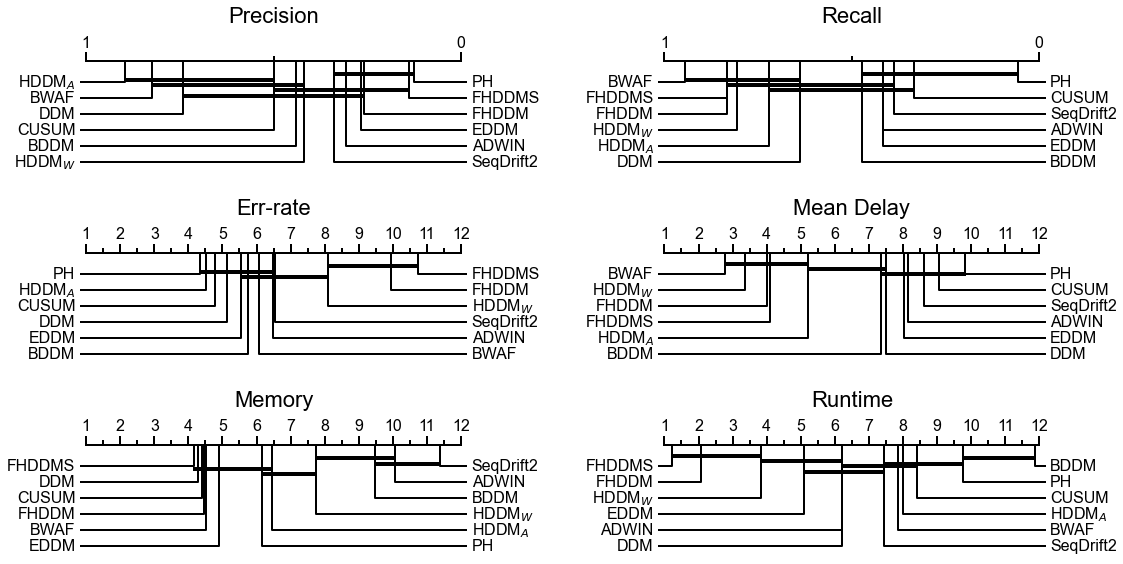

In [6]:
latex = process_results(
    results[ results['Detector']!='CDDM' ].drop( columns=['Model', 'Datastream', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}_no_cddm.tex',
    fig_path=f'figures/{category}_no_cddm.pdf',
    bold_best=True,
    alpha=0.05
)

## Model = Hoeffding Tree, include CDDM

Writing LaTeX table to tables/mimic_hoeffding.tex


/anaconda3/envs/triage_drift_env/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Writing cd diagrams to figures/mimic_hoeffding.pdf
\begin{tabular}{lrrrrrr}
\toprule
{} &         Precision &            Recall &           Err-rate (\%) &          Mean Delay &               Memory (bytes) &              Runtime (ms) \\
Detector    &                   &                   &                    &                     &                      &                      \\
\midrule
ADWIN       &       0.41 (0.42) &       0.50 (0.50) &       48.45 (4.86) &      165.50 (93.61) &    3903.53 (2811.90) &    2079.82 (1219.19) \\
BDDM        &       0.40 (0.37) &       0.50 (0.50) &       47.38 (5.97) &      156.83 (95.08) &    4686.69 (3662.80) &    5941.75 (4263.53) \\
BWAF        &       0.85 (0.27) &  {\fontseries{b}\selectfont 1.00 (0.00)} &       47.56 (4.43) &       43.67 (33.74) &    4475.22 (4286.46) &     2048.51 (899.84) \\
CDDM        &       0.04 (0.03) &       1.00 (0.00) &       51.95 (3.61) &  {\fontseries{b}\selectfont 14.25 (10.34)} &  {\fontseries{b}\selectfont 1537.6

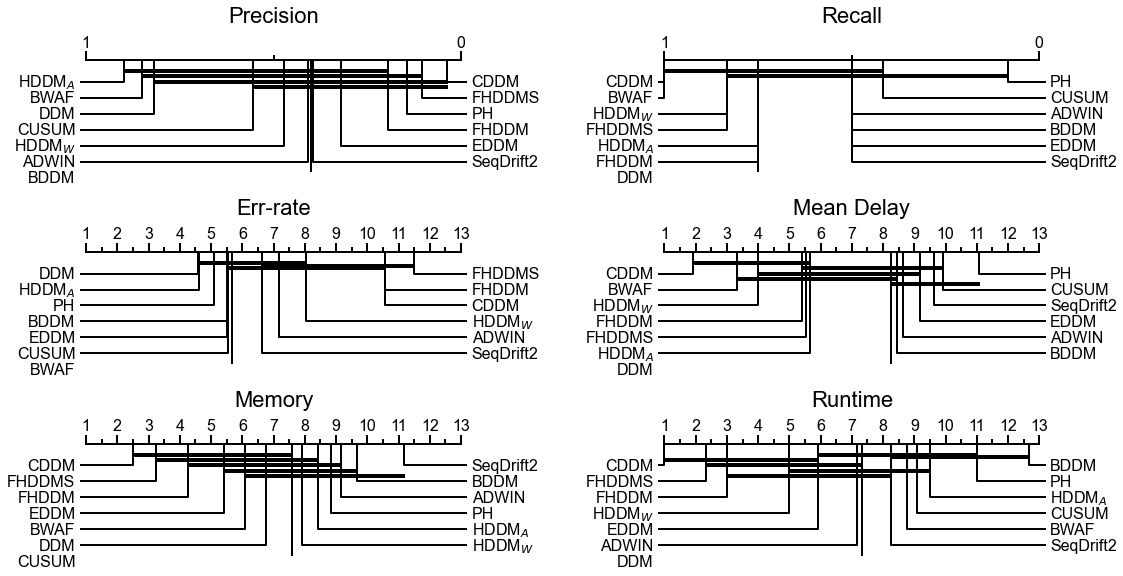

In [7]:
print(process_results(
    results[ results['Model']=='HOEFFDING TREE' ].drop( columns=['Model', 'Datastream', 'Mode'] ), 
    groupby='Detector', 
    latex_path=f'tables/{category}_hoeffding.tex',
    fig_path=f'figures/{category}_hoeffding.pdf',
    bold_best=True,
    alpha=0.05
))

## Novel Detectors vs Modes

In [8]:
print(process_results(
    results[ results['Detector'].isin(['BDDM', 'BWAF', 'CDDM']) ]
        .drop( columns=['Model', 'Datastream'] ), 
    groupby=['Detector', 'Mode'], 
    latex_path=f'tables/{category}_modes.tex',
#     fig_path='figures/benchmarks_modes.pdf',
    cd_diagram=False,
    bold_best=False
))

Writing LaTeX table to tables/mimic_modes.tex
\begin{tabular}{lrrrrrrr}
\toprule
     &                &    Precision &       Recall &      Err-rate (\%) &      Mean Delay &             Memory (bytes) &             Runtime (ms) \\
Detector & Mode &              &              &               &                 &                    &                     \\
\midrule
BDDM & Abrupt Drift &  0.60 (0.37) &  0.67 (0.47) &  44.61 (4.08) &  114.33 (96.22) &  3309.26 (3676.75) &   4374.25 (2159.81) \\
     & Gradual Drift &  0.40 (0.20) &  0.67 (0.47) &  45.16 (2.70) &  132.67 (93.86) &   1279.08 (964.52) &   3905.24 (2261.32) \\
     & High Noise &  0.00 (0.00) &  0.00 (0.00) &  52.77 (3.53) &   250.00 (0.00) &  2623.69 (3776.46) &   8672.32 (2521.15) \\
     & Long Concepts &  0.70 (0.24) &  0.83 (0.37) &  46.88 (3.60) &  121.00 (59.06) &   1057.73 (679.90) &  14526.29 (9317.79) \\
     & Low Noise &  0.33 (0.37) &  0.50 (0.50) &  44.56 (6.17) &  163.17 (87.30) &  3298.26 (3638.91) &   5649.17 